In [118]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from matplotlib.textpath import TextPath

In [2]:
df = pd.read_csv('../dataset/complete_dataset.csv')

C:\Users\janko\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (0,1,3,5,6,7,8,9,16) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [9]:
#df.dropna(subset=['text', 'genre', 'year', 'production_region'], inplace=True)
df.drop_duplicates(subset=['IMDB_ID'], inplace=True)
df.shape

(3729, 19)

In [10]:
from pathlib import Path
import numpy as np
def read_embeddings(embedding_file: str):
    data = Path(embedding_file).read_text()
    lines = data.split('\n')
    filenames = []
    embeddings = []
    for line in lines:
        line_data = line.split(' ')
        if len(line_data) >=2 :
            filenames.append(line_data[0])
            embeddings.append(list(map(float, line_data[1:])))
    return np.asarray(filenames), np.asarray(embeddings)

In [11]:
filenames, embeddings = read_embeddings('../dataset/embeddings.txt')

In [12]:
filenames.shape, embeddings.shape

((3729,), (3729, 300))

In [13]:
df = df[df['filename'].isin(filenames)].copy()
df.shape

(3729, 19)

In [14]:
(df.filename == filenames).all()

True

In [15]:
#Einfügen der Embeddings ins Dataframe
df['embedding'] = [e for e in embeddings]
df.head()

,filename,text,IMDB_ID,genre,year,production_region,corpus,duration,directors,writers,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,averageRating,numVotes,embedding
706,6416324.xml,Der Roman von Alexandre Dumas dem Älteren hatt...,tt1104767,"Adventure,Drama,History",1943.0,French,untokenisiert,90,"nm0894509,nm0148602","nm0241416,nm0816458,nm0763376,nm0812731",movie,The Count of Monte Cristo - Part 2: Retribution,"Le comte de Monte Cristo, 2ème époque: Le chât...",0.0,1943.0,NaN,90,7.0,80.0,"[-0.09066946, 0.13505703, -0.19079152, -0.2511..."
2784,4732286.xml,Hände hoch oder ich schieße ( 1966 ) dTV - MDR...,tt1631717,Comedy,1966.0,German,untokenisiert,75,nm0440757,"nm0440757,nm0833141,nm1127102",movie,Hände hoch oder ich schieße,Hände hoch oder ich schieße,0.0,1966.0,NaN,75,5.8,36.0,"[-0.08849932, 0.13341562, -0.16020295, -0.2384..."
3085,6122081.xml,"Hallo , Manuela ? Störe ich ? Kann ich zu dir ...",tt1271979,Drama,1967.0,French,untokenisiert,78,nm0816215,nm0816215,movie,La lune avec les dents,La lune avec les dents,0.0,1967.0,NaN,78,7.0,34.0,"[-0.07498731, 0.13234918, -0.14840715, -0.2293..."
6044,5594522.xml,Dein Vater war ein ausgezeichneter Kämpfer . A...,tt3141954,"Action,Adventure",1978.0,Cantonese,untokenisiert,82,nm1172472,NaN,movie,Brawl Busters,Sa-dae-tong-iue-moon,0.0,1978.0,NaN,82,6.2,31.0,"[-0.08724029, 0.1408841, -0.19008194, -0.26056..."
6281,5618549.xml,"Na los , iss jetzt schnell auf . Junge , ist d...",tt1065116,Action,1979.0,Japanese,untokenisiert,96,nm0814232,"nm0032816,nm0793999,nm0814232",movie,Sûpâ gun redei Wani Bunsho,Sûpâ gun redei Wani Bunsho,0.0,1979.0,NaN,96,5.7,44.0,"[-0.07911543, 0.15853323, -0.1507321, -0.24809..."


## Plot über Zeit

Mean:  2012.2115848753017 Median:  2012.0


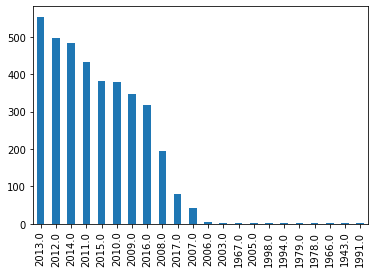

In [73]:
pd.value_counts(df['year']).plot.bar()
print('Mean: ', df['year'].mean(), 'Median: ', df['year'].median())

In [79]:
df[df.year == 2006]

,filename,text,IMDB_ID,genre,year,production_region,corpus,duration,directors,writers,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,averageRating,numVotes,embedding
21193,4747681.xml,Ha ! Dahab ich tatsächlich meinen Schlagring v...,tt1080767,"Action,Comedy",2006.0,Japanese,untokenisiert,62,nm1175724,"nm1175724,nm0619076",movie,Sukeban Boy,Oira sukeban,0.0,2006.0,NaN,62,5.2,424.0,"[-0.05551538, 0.1487382, -0.13886967, -0.25074..."
21195,5562362.xml,"Haruo , ich hab Hunger . Lass uns den Tintenfi...",tt1090246,"Comedy,Drama,Fantasy",2006.0,Japanese,untokenisiert,64,nm1241516,nm2423976,movie,Uncle's Paradise,Ojisan tengoku,0.0,2006.0,NaN,64,4.8,105.0,"[-0.077983305, 0.176829, -0.14804043, -0.24749..."
21214,3524993.xml,Geld regiert die Welt ... wer also das Geld re...,tt1828247,"Animation,Documentary",2006.0,English,untokenisiert,47,nm4290030,nm4290030,movie,Money as Debt,Money as Debt,0.0,2006.0,NaN,47,8.2,409.0,"[-0.1121629, 0.033427905, -0.16713078, -0.1989..."
21220,5600913.xml,Deutsche Untertitel : Reinhard Paetsch welch e...,tt2196596,"Comedy,Drama,Music",2006.0,French,untokenisiert,125,nm6864569,"nm1115982,nm6864572,nm1129826",movie,Le roi soleil,Le roi soleil,0.0,2006.0,NaN,125,8.0,67.0,"[-0.09398479, 0.11179132, -0.20337518, -0.2586..."


In [22]:
df_sample = df.sample(frac=1)
df_sample.shape

(3729, 20)

In [ ]:
df_sample

In [269]:
sincevalue = 2017
beforevalue = 2000
since = df.year >= sincevalue
before = df.year <= beforevalue
years = since + before
years.shape
colorlist = []

for x in df.year:
    if x >=2017:
        colorlist.append('red')
    elif x <= 2007:
        colorlist.append('blue')
    else: 
        colorlist.append('white')

C:\Users\janko\Anaconda3\lib\site-packages\pandas\core\computation\expressions.py:194: UserWarning: evaluating in Python space because the '+' operator is not supported by numexpr for the bool dtype, use '|' instead
  op=op_str, alt_op=unsupported[op_str]


In [270]:
df['labelcolor']=colorlist

In [271]:
model = KMeans(n_clusters=2)
model.fit(embeddings)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [272]:
len(model.labels_)

3729

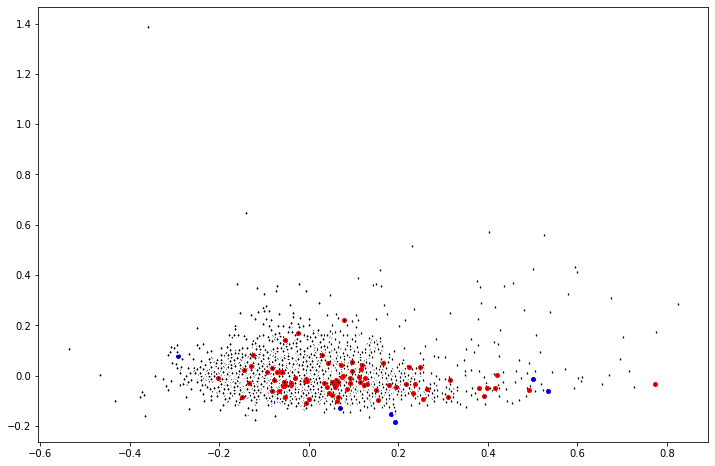

In [273]:
pca = PCA(n_components=2)
pca.fit(embeddings)
X_tf = pca.transform(embeddings)

#Abspeichern der Zwischenergebnisste im Datafram
df['pca2d_1'] = X_tf[:,0]
df['pca2d_2'] = X_tf[:,1]
df['kmeans'] = model.labels_

#Plotten anhand der gespeicherten Zwischenergebnisse 
plt.figure(figsize=(12,8))
for d in df.iterrows():
    x = d[1].pca2d_1
    y = d[1].pca2d_2    
    plt.plot(x, y, 'o', markersize=4, color= d[1].labelcolor)
    plt.plot(x, y, marker=TextPath((-3, -3), f'{d[1].kmeans}'), color='black', markersize=1)


3729


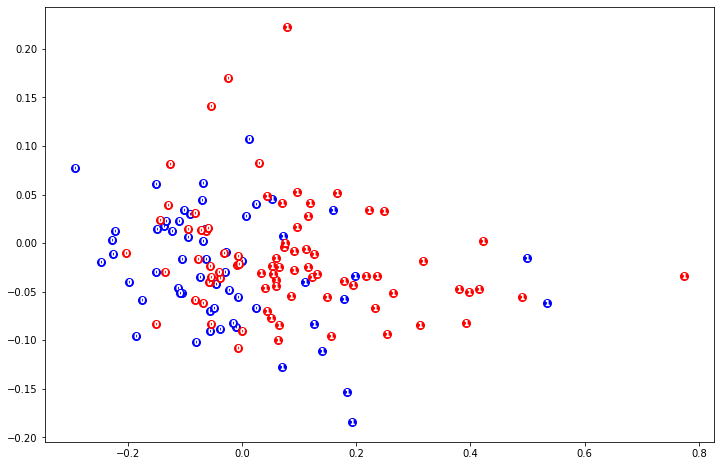

In [274]:
pca = PCA(n_components=2)
pca.fit(embeddings)
X_tf = pca.transform(embeddings)
print(len(X_tf))
df['pca2d_1'] = X_tf[:,0]
df['pca2d_2'] = X_tf[:,1]
df['kmeans'] = model.labels_

df_clean = df[df.labelcolor != 'white']
#df_embedding = df_clean['embedding']
#df_embedding.tolist()

plt.figure(figsize=(12,8))
for d in df_clean.iterrows():
    x = d[1].pca2d_1
    y = d[1].pca2d_2    
    plt.plot(x, y, 'o', markersize=8, color= d[1].labelcolor)
    plt.plot(x, y, marker=TextPath((-3, -3), f'{d[1].kmeans}'), color='white', markersize=6)


In [275]:
b1 = df.loc[(df['kmeans'] == 1) & (df['labelcolor'] == 'blue')]
b0 = df.loc[(df['kmeans'] == 0) & (df['labelcolor'] == 'blue')]
r1 = df.loc[(df['kmeans'] == 1) & (df['labelcolor'] == 'red')]
r0 = df.loc[(df['kmeans'] == 0) & (df['labelcolor'] == 'red')]
print('b1: ', len(b1), 'b0: ', len(b0), 'r1: ', len(r1), 'r0: ', len(r0))

b1:  13 b0:  45 r1:  50 r0:  30
